In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
file_path = "..\\data\\wine.csv"
df = pd.read_csv(file_path)
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# 데이터 분리 (특징과 라벨)
X = df.drop(columns=["Wine"])  # 특징 (Feature)
y = df["Wine"]  # 등급 (Label)

In [4]:
# 훈련 / 테스트 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 스케일링 (SVM, LR, KNN에서 필요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 모델 리스트
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier()
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    if name in ["SVM", "Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

In [6]:
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

Decision Tree: 0.9444
Random Forest: 1.0000
SVM: 0.9722
Logistic Regression: 0.9722
KNN: 0.9722


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
file_path = "..\\data\\wine.csv"  # 파일 경로 (실행 환경에 맞게 수정)
df = pd.read_csv(file_path)

# 특성(X)과 라벨(y) 분리
X = df.drop(columns=["Wine"]).values
y = pd.get_dummies(df["Wine"]).values  # 원핫 인코딩

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 정의
model = Sequential([
    Input(shape=(X.shape[1],)),  # 명시적으로 입력 크기 지정
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # 클래스 개수만큼 출력 뉴런 설정
])

# 모델 컴파일
model.compile(optimizer='adam',  
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443 (1.73 KB)

 Trainable params: 443 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.utils import to_categorical

# y_train과 y_test가 1부터 시작하면 0부터 시작하도록 조정
y_train = y_train - 1
y_test = y_test - 1

# 클래스 개수 설정 (예: 3개라면 3, 4개라면 4)
num_classes = len(np.unique(y_train))

# 원-핫 인코딩 변환
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [16]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8712 - loss: 0.4904 - val_accuracy: 0.8889 - val_loss: 0.4643
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9120 - loss: 0.4717 - val_accuracy: 0.8889 - val_loss: 0.4549
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9079 - loss: 0.4484 - val_accuracy: 0.9167 - val_loss: 0.4448
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9173 - loss: 0.4601 - val_accuracy: 0.9167 - val_loss: 0.4349
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9140 - loss: 0.4441 - val_accuracy: 0.9167 - val_loss: 0.4242
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9342 - loss: 0.4193 - val_accuracy: 0.9167 - val_loss: 0.4135
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9437 - loss: 0.3887 - val_accuracy: 0.9167 - val_loss: 0.4029
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9506 - loss: 0.3999 - val_accuracy: 0.9167 - val_loss: 0.3904


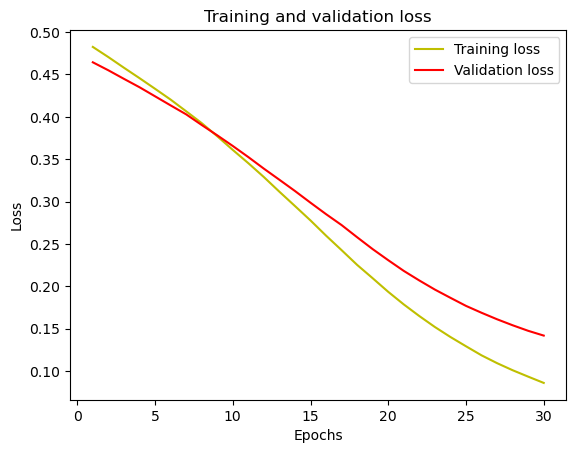

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

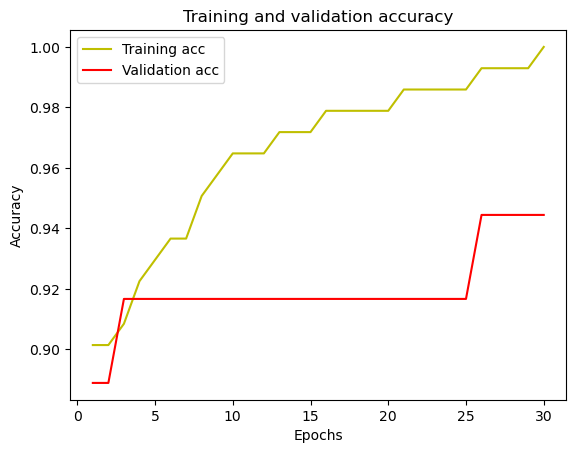

In [20]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

[[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]


In [22]:
import numpy as np

# y_train, y_test가 one-hot encoding 되어 있다면 원래 라벨 형태로 변환
if y_train.ndim > 1:
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

In [23]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝을 위한 설정
param_grid = {
    "Decision Tree": {"max_depth": [3, 5, 10], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Logistic Regression": {"C": [0.1, 1, 10], "solver": ["lbfgs", "liblinear"]},
    "KNN": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
}

best_models = {}
best_scores = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring="accuracy", n_jobs=-1)
    
    if name in ["SVM", "Logistic Regression", "KNN"]:
        grid_search.fit(X_train_scaled, y_train)
    else:
        grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_

# 최적 모델 출력
best_scores

{'Decision Tree': 0.9231527093596059,
 'Random Forest': 0.9862068965517242,
 'SVM': 0.9862068965517242,
 'Logistic Regression': 0.9862068965517242,
 'KNN': 0.9578817733990148}